In [1]:
import cv2
import numpy as np
import os
import sys
sys.path.append('../../src')
import DISData as DD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
doUT = DD.SQL()

host:  192.168.0.128
user:  diadmin
password:  ········


SQL connection done


In [3]:
data_name = 'preventing_drowsy_realroad'

In [34]:
query = f'''select occupant_age, count(img_dir) as count from DeepInSight.{data_name}_box_info group by occupant_age;'''

In [35]:
db = doUT.db
conn = doUT.conn
conn.execute(query)
column_names = [desc[0] for desc in conn.description]
result = conn.fetchall()
db.commit()

In [36]:
df = pd.DataFrame(result, columns=column_names)
df['count'] = df['count'].astype('int64')

In [37]:
df = df.sort_values(by='occupant_age')
df

,occupant_age,count
0,20,38115
1,30,114716
2,40,219077
3,50,253928
4,60,121211
5,70,12887


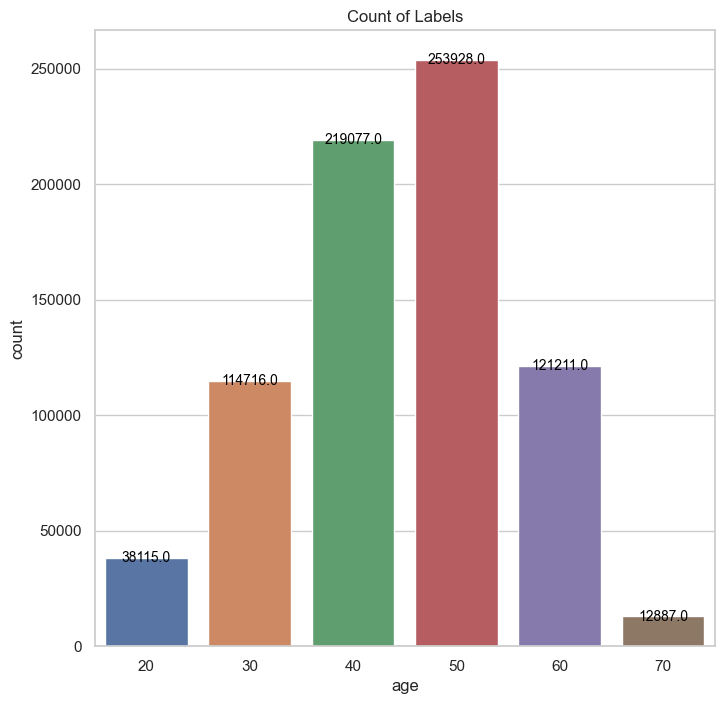

In [40]:
try:
    plt.figure(figsize=(8, 8))
    sns.set(style="whitegrid")
    # plt.xticks(rotation=45, ha='right')
    ax = sns.barplot(x='occupant_age', y='count', data=df, hue='occupant_age')
    for p in ax.patches:
        label = p.get_height()  # 막대의 너비를 가져와서 count로 사용
        count = p.get_x() + p.get_width() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{label}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('age')
    plt.ylabel('count')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_label3.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)